#M4-T1-Machine Learning Aplicações Práticas (aula 02)

Docente: Ítalo Guedes

Nome aluno: Arlindo Crivari Netto

#Importação das bibliotecas

Na linhas de código abaixo, iremos importar as bibliotecas que iremos utilizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

#Importação do Dataset (Excel)

Na linhas de código abaixo, iremos carregar o dataset que iremos utilizar.

In [3]:
df = pd.read_csv('/content/numerical_dataset_R01.csv', delimiter=';')
df.head(15)

,outlook,temperature,humidity,windy,status
0,10,27,95,3,NÃO APTO
1,10,8,97,16,NÃO APTO
2,20,9,37,16,NÃO APTO
3,34,7,80,16,NÃO APTO
4,46,20,24,15,NÃO APTO
5,33,10,71,5,APTO
6,47,8,16,18,NÃO APTO
7,11,23,81,11,NÃO APTO
8,36,23,97,0,APTO
9,50,38,65,16,NÃO APTO


Informações gerais sobre o Dataset:

- outlook: normal 25% a 75%

- temperature: normal 20°C a 30°C

- humidity: normal 30% a 70%

- windy: normal < 15km/h

#Visualização dos Dados

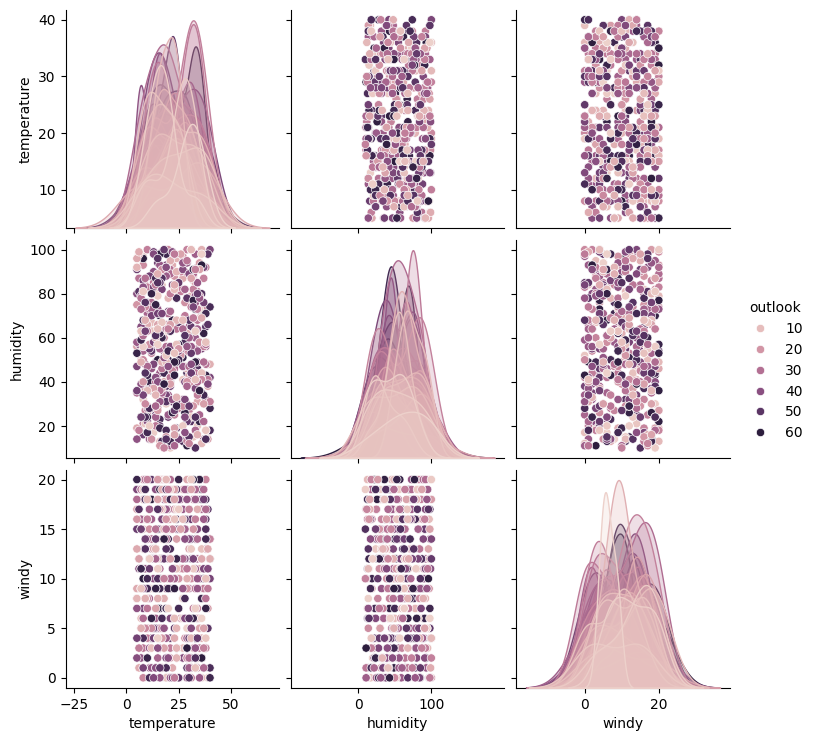

In [ ]:
sns.pairplot(df, hue='outlook')
plt.show()

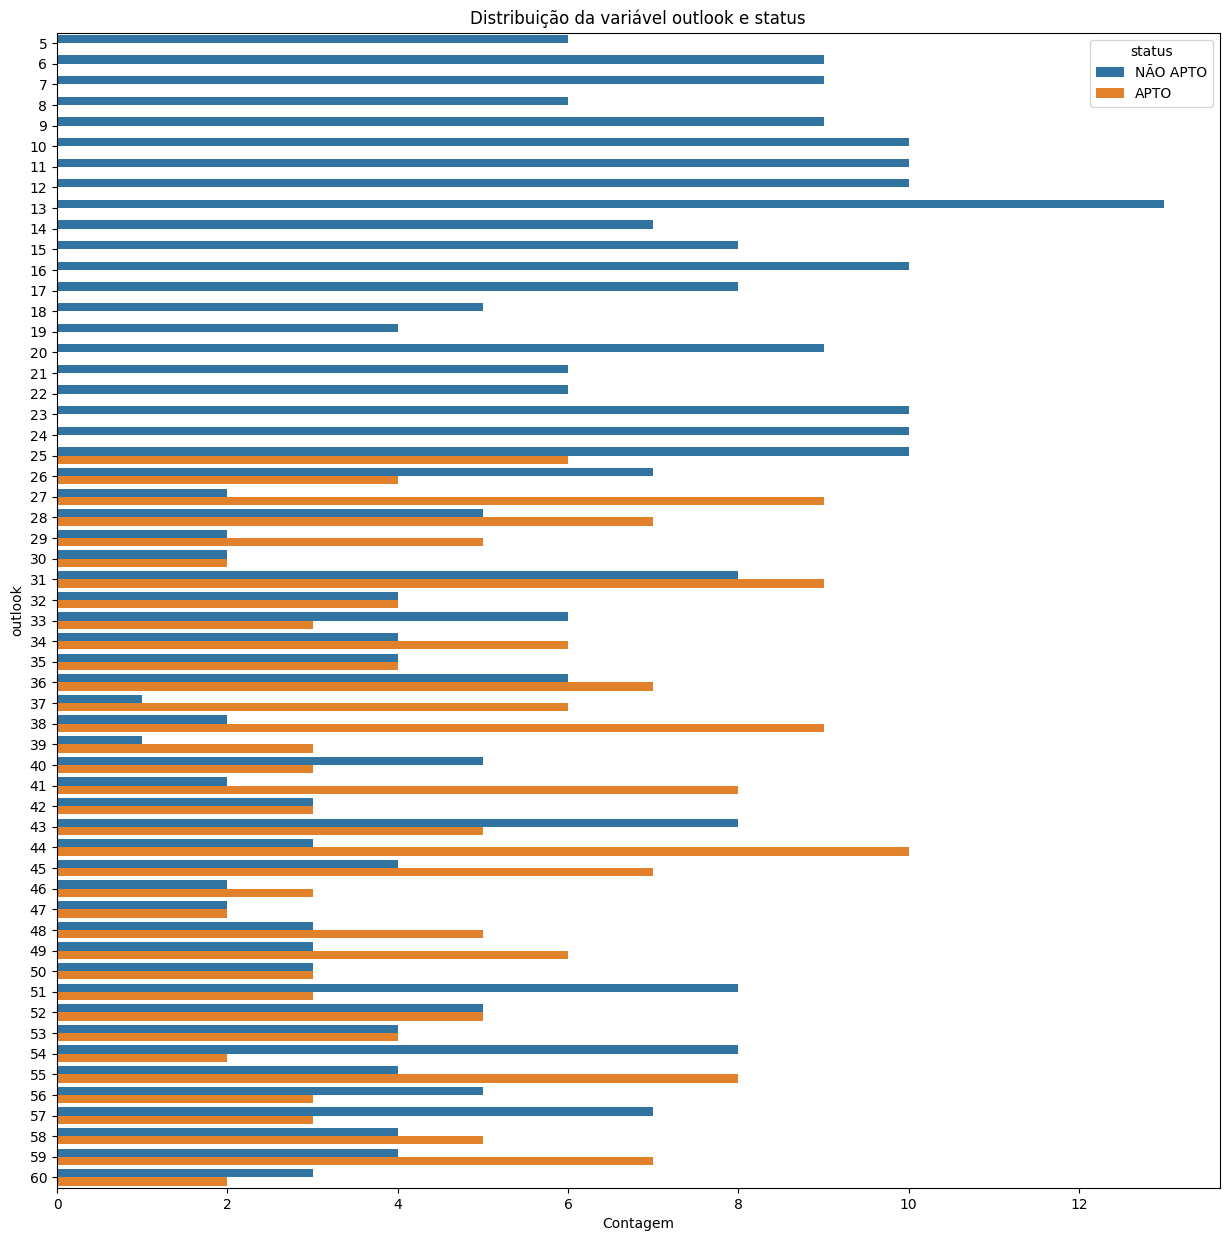

In [ ]:
#criar um gráfico de barras horizontal com a distribuição da variável outlook e a variável status do df

plt.figure(figsize=(15, 15))
sns.countplot(y='outlook', hue='status', data=df)
plt.title('Distribuição da variável outlook e status')
plt.xlabel('Contagem')
plt.ylabel('outlook')
plt.show()

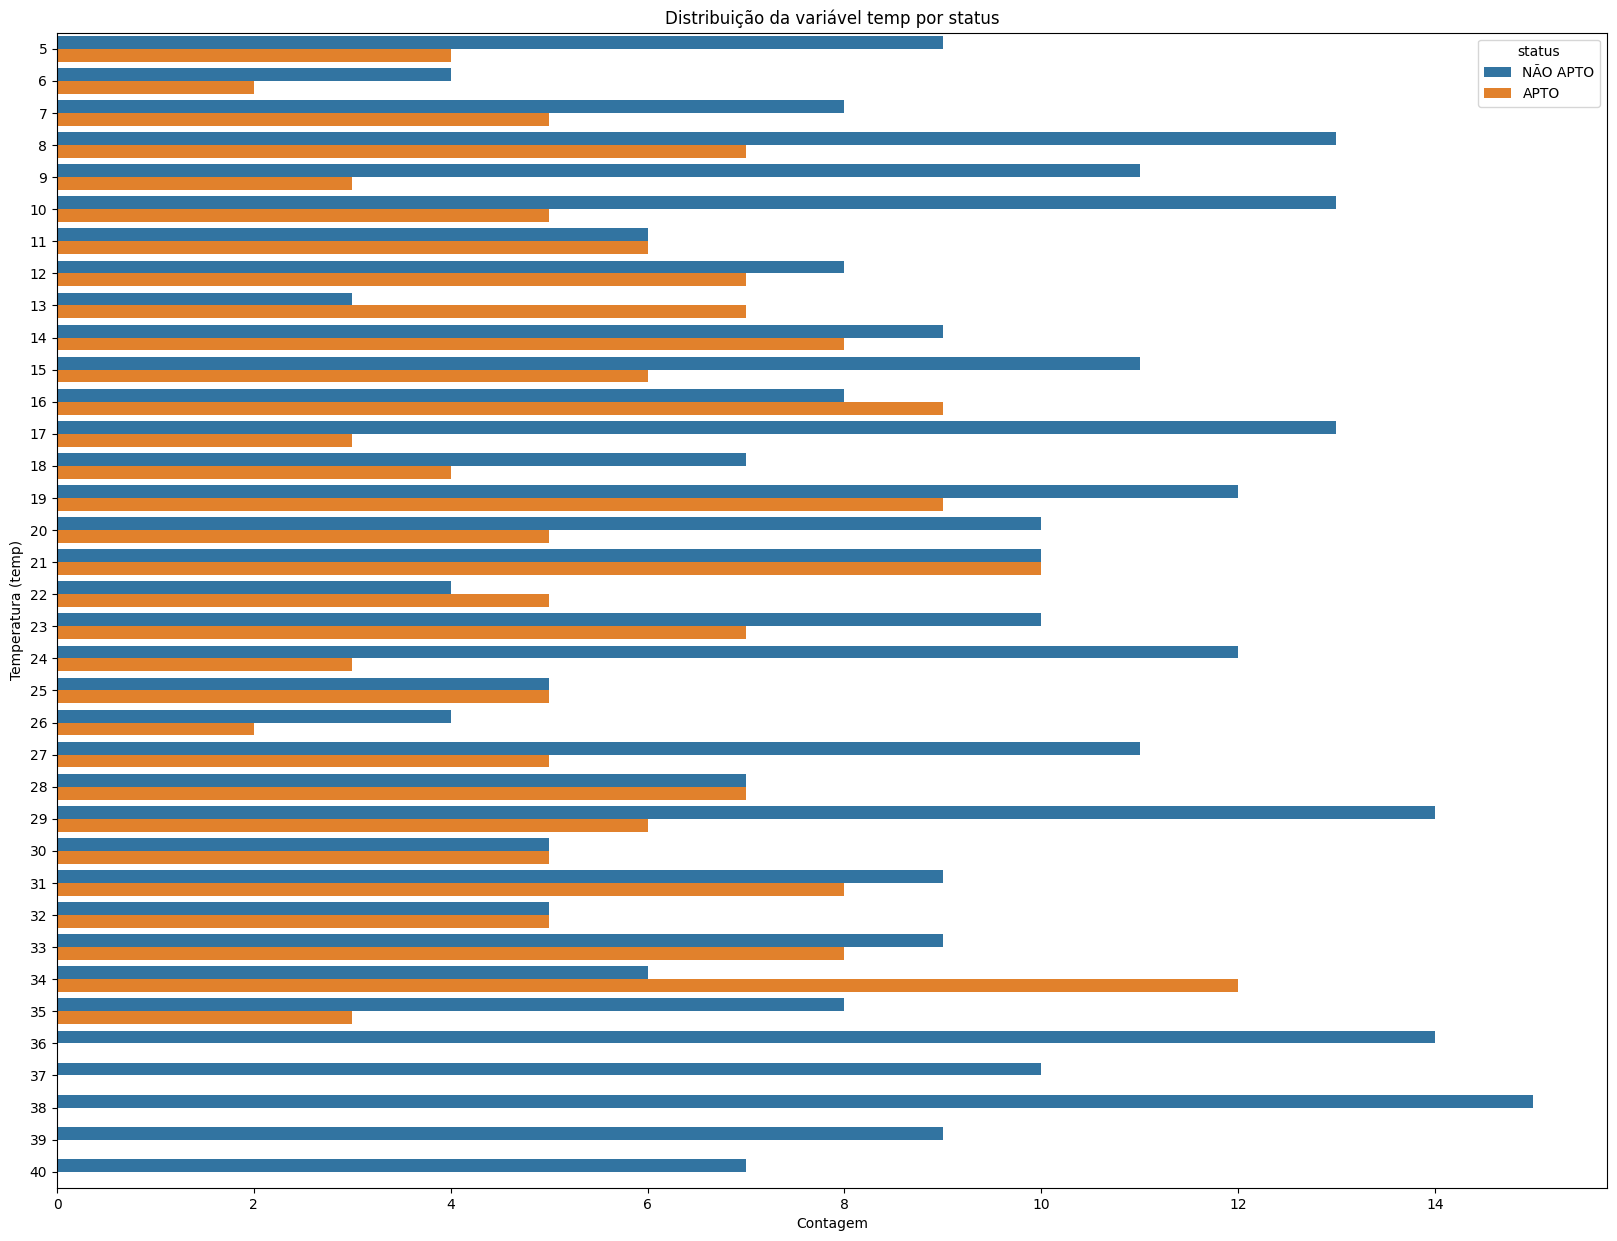

In [ ]:
# prompt: criar um gráfico de barras horizontal com a distribuição da variável temp e a variável status do df

plt.figure(figsize=(20, 15))
sns.countplot(y='temperature', hue='status', data=df)
plt.title('Distribuição da variável temp por status')
plt.xlabel('Contagem')
plt.ylabel('Temperatura (temp)')
plt.show()

#Separando *inputs* e *outputs*

In [12]:
X = df.drop('status', axis=1)
y = df.status
X

,outlook,temperature,humidity,windy
0,10,27,95,3
1,10,8,97,16
2,20,9,37,16
3,34,7,80,16
4,46,20,24,15
...,...,...,...,...
495,48,34,80,4
496,25,18,10,10
497,28,29,95,11
498,6,11,20,12


#Normalizando os Dados

Normalização é um redimensionamento dos dados do intervalo original para que todos os valores fiquem dentro do novo intervalo de 0 e 1.

A escala padrão para o MinMaxScaler é redimensionar as variáveis ​​no intervalo [0,1], embora uma escala preferencial possa ser especificada por meio do argumento “ feature_range ” e especificar uma tupla, incluindo o mínimo e o máximo para todas as variáveis.

In [13]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)
X_norm

array([[0.09090909, 0.62857143, 0.94444444, 0.15      ],
       [0.09090909, 0.08571429, 0.96666667, 0.8       ],
       [0.27272727, 0.11428571, 0.3       , 0.8       ],
       ...,
       [0.41818182, 0.68571429, 0.94444444, 0.55      ],
       [0.01818182, 0.17142857, 0.11111111, 0.6       ],
       [0.72727273, 0.        , 0.28888889, 0.2       ]])

#Implementando o algoritmo KNN

In [6]:
from sklearn.tree import DecisionTreeClassifier

#Configurando o classificador Decision Tree (profundidade, nº de folhas)

In [7]:
dt = DecisionTreeClassifier (max_depth=6, max_leaf_nodes=4)

In [8]:
#visualizar o max_depth do dt = DecisionTreeClassifier
dt.max_depth

6

In [9]:
#visualizar o dt.get_n_leaves do dt = DecisionTreeClassifier
dt.max_leaf_nodes

4

#Separando conjunto de treino e teste

Para verificar a eficácia de um modelo de Machine Learning, o conjunto de dados inicial é dividido em dois conjuntos: um conjunto de treinamento e um conjunto de teste. O conjunto de treinamento é usado para ajustar, ou seja, treinar, o modelo em parte dos dados. O conjunto de teste é usado para avaliar o desempenho do modelo na outra parte dos dados. A função train_test_split na biblioteca ScikitLearn (sklearn) do Python permite essa separação em dois conjuntos.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#criando variáveis (treino e teste)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=2/3)

#Avaliando a acurácia do algoritmo Decision Tree

In [15]:
dt.fit(X_train, y_train)
accuracy_score(y_test, dt.predict(X_test))

0.9520958083832335

In [18]:
resultado_dt = dt.predict(X_test)

#Avaliando o resutlado do modelo treinado

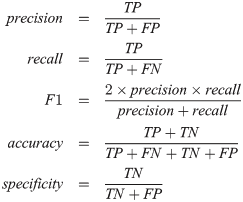

- A precisão mede a proporção de previsões positivas verdadeiras entre todas as previsões positivas feitas pelo modelo. Ela é calculada como a razão de positivos verdadeiros para a soma de positivos verdadeiros e positivos falsos

- Recall mede a proporção de previsões positivas verdadeiras entre todas as instâncias positivas reais no conjunto de dados. É calculado como a razão de positivos verdadeiros para a soma de positivos verdadeiros e negativos falsos.

- F1-score é a média harmônica de precisão e recall. Ela fornece uma única métrica que combina precisão e recall, equilibrando o trade-off entre os dois. Ela é calculada como:

- O F1-score considera falsos positivos e falsos negativos, o que o torna uma métrica útil para conjuntos de dados desequilibrados, onde a precisão e a recuperação podem ser distorcidas.

- A acurácia é a proporção de todas as classificações que estavam corretas, sejam positivas ou negativas.

In [19]:
print(classification_report(y_test, resultado_dt))

              precision    recall  f1-score   support

        APTO       0.89      1.00      0.94        62
    NÃO APTO       1.00      0.92      0.96       105

    accuracy                           0.95       167
   macro avg       0.94      0.96      0.95       167
weighted avg       0.96      0.95      0.95       167



#Criando / visualizando  matriz de confusão

Em uma matriz de confusão, as colunas representam os valores previstos de uma determinada classe, enquanto as linhas representam os valores reais (ou seja, a verdade fundamental) de uma determinada classe, ou vice-versa. Observe que o inverso também aparece na pesquisa. Essa estrutura de grade é uma ferramenta conveniente para visualizar a precisão da classificação do modelo, exibindo o número de previsões corretas e incorretas para todas as classes, uma ao lado da outra.

Um modelo de matriz de confusão padrão para um classificador binário pode ter esta aparência:

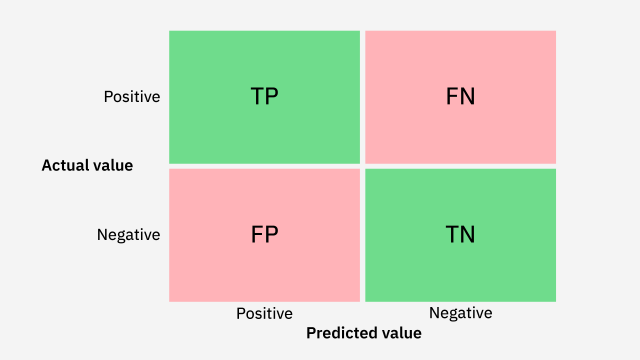

Exemplo de layout de matriz de confusão
A caixa superior esquerda fornece o número de verdadeiros positivos (TP), sendo o número de previsões corretas para a classe positiva.

A caixa abaixo dela são falsos positivos (FP), essas instâncias de classe negativa identificadas incorretamente como casos positivos. Esses também são chamados de erros do tipo I em estatísticas.

A caixa superior direita é o número de falsos negativos (FN), as instâncias positivas reais previstas erroneamente como negativas.

Finalmente, a caixa inferior direita exibe o número de verdadeiros negativos (VN), que são as instâncias de classe negativa reais previstas com precisão. O total de cada um desses valores forneceria o número total de previsões do modelo.

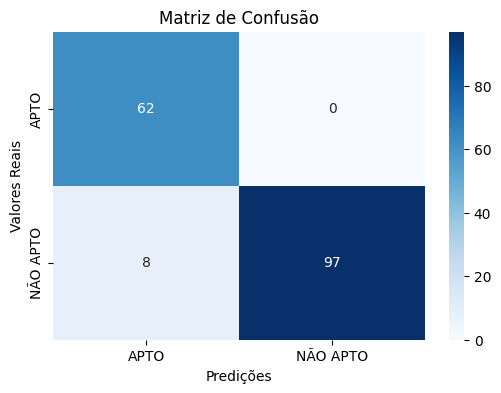

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
# Criar a matriz de confusão
cm = confusion_matrix(y_test, resultado_dt)

# Plotar a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predições")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

#Visualizando a Árvore de Decisão criada

In [21]:
from sklearn.tree import export_graphviz
import graphviz

#Exporte a árvore de decisão para um arquivo DOT

In [22]:
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X.columns,  # Use the actual feature names
                           class_names=['outlook', 'temp', 'humidity', 'windy'], #Replace with your class names
                           filled=True, rounded=True,
                           special_characters=True)

#Criando e visualizando o gráfico

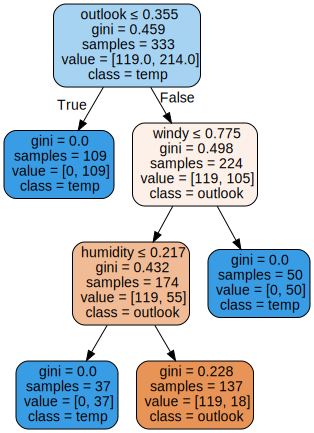

In [23]:
# Crie um gráfico graphviz a partir dos dados DOT
graph = graphviz.Source(dot_data)

# Visualize o gráfico
graph

#Realizando uma nova predição (modelo treinado)

In [28]:
novo_cenario = [[10, 20, 30, 40]]
X_new = minmax.transform(novo_cenario)
X_new

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.09090909, 0.42857143, 0.22222222, 2.        ]])

In [27]:
dt.predict(X_new)

array(['NÃO APTO'], dtype=object)

##Atividade - realizar comentário sobre o modelo de aprendizagem

Descrever brevemente em um parágrafo os tópicos abaixo.


1. Dataset (problema a ser resolvido):

[escrever breve texto sobre o dataset]




2. Paradigma de aprendizagem (escolhido), evidenciar benefícios do paradigma:

[escrever o texto]





3. Hiperperâmetros do modelo de aprendizagem (adotado):

[escrever o texto]





4. Resultado obtido (acurácia, precision, recall, f1-score, support):

[escrever o texto]

